# Loading the FRFMemsHOSMAAvg correction

® *Copyright Bimea 2024-2025*

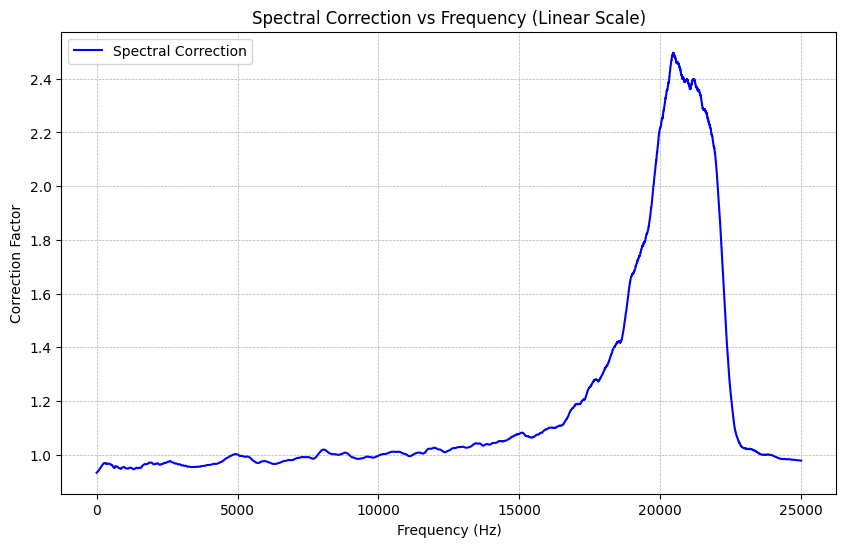

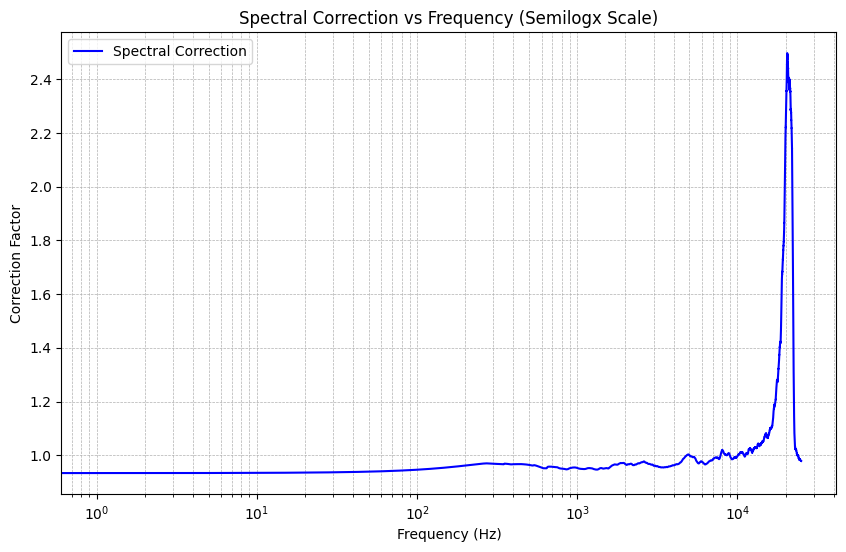

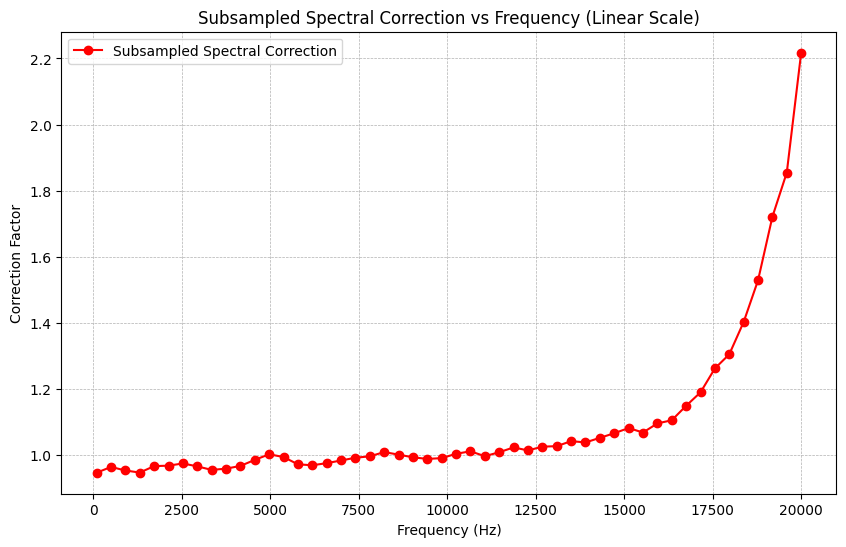

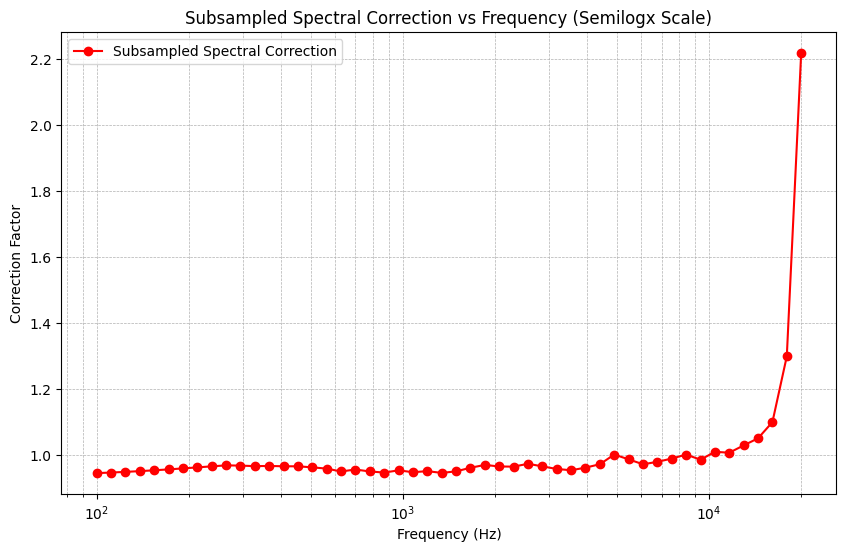

In [ ]:
"""
using_spectral_correction.ipynb

Script to load spectral correction data from a JSON file,
apply an offset, and plot the results in both linear and semilogx scales.
Also includes subsampling of the data for visualization or application constraints.
"""

import numpy as np
import matplotlib.pyplot as plt
import json

FILENAME = 'assets/FRFMemsHOSMAAvg.json'
with open(FILENAME, 'r') as f:
    frfcorrector = json.load(f)

# get frequencies and corrections
frequencies = np.array(frfcorrector['f'])
corrections = np.array(frfcorrector['FRF'])

# Add 0.905 to all correction values
corrections += 0.905

# Plot the corrections in linear scale
plt.figure(figsize=(10, 6))
plt.plot(frequencies, corrections, label='Spectral Correction', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Correction Factor')
plt.title('Spectral Correction vs Frequency (Linear Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Plot the corrections in semilogx scale
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, corrections, label='Spectral Correction', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Correction Factor')
plt.title('Spectral Correction vs Frequency (Semilogx Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Subsample to N point between FMIN and FMAX
FMIN = 100
FMAX = 20000
N = 50

# Subsample to N point between FMIN and FMAX in linear scale
freqs_subsampled = np.linspace(FMIN, FMAX, N)
corrections_subsampled_lin = np.interp(freqs_subsampled, frequencies, corrections)

# Same in linear scale
plt.figure(figsize=(10, 6))
plt.plot(freqs_subsampled, corrections_subsampled_lin, 'o-', label='Subsampled Spectral Correction', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Correction Factor')
plt.title('Subsampled Spectral Correction vs Frequency (Linear Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Subsample to N point between FMIN and FMAX in logarithmic scale
freqs_subsampled = np.logspace(np.log10(FMIN), np.log10(FMAX), N)
corrections_subsampled_log = np.interp(freqs_subsampled, frequencies, corrections)

# PLot subsampled corrections
plt.figure(figsize=(10, 6))
plt.semilogx(freqs_subsampled, corrections_subsampled_log, 'o-', label='Subsampled Spectral Correction', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Correction Factor')
plt.title('Subsampled Spectral Correction vs Frequency (Semilogx Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()